## Gaussian Naive Bayes from scratch

In [1]:
from __future__ import division, print_function
import numpy as np
import math

class NaiveBayes():
    """The Gaussian Naive Bayes classifier. """
        
    def fit(self, X, y):
        self.X, self.y = X, y
        self.classes = np.unique(y)
        self.parameters = []
        # Calculate the mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            X_c = X[np.where(y == c)]
            self.parameters.append([])
            for col in X_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, x):
        coeff = 1.0 / math.sqrt(2.0 * math.pi * var + 1e-4)
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * var + 1e-4)))
        return coeff * exponent
    
    def _classify(self, sample):
        """ 
        Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
        P(X|Y) = P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
        assume P(X) = 1
        """
        posteriors = []
        for i, c in enumerate(self.classes):
            X_c = self.X[np.where(self.y == c)] 
            posterior = len(X_c)/len(self.X) # P(Y)
            for feature_value, params in zip(sample, self.parameters[i]):
                likelihood = self._calculate_likelihood(params["mean"], params["var"], feature_value)
                posterior *= likelihood   # P(Y|X)
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X_test):
        y_pred = [self._classify(sample) for sample in X_test]
        return np.array(y_pred)

In [2]:
X = np.array([[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7]]).T
y = np.array([0, 0, 0, 1, 1, 1])
X_t=np.array([[7,8], [0,1]])
NB = NaiveBayes()
NB.fit(X, y)
NB.predict(X_t)

array([2, 0])

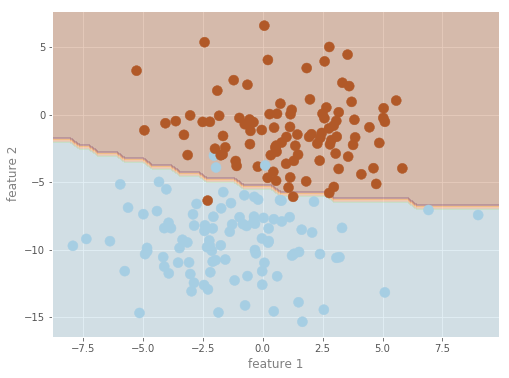

In [3]:
## Model and visulization

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
plt.style.use('ggplot')

X_train, y_train = make_blobs(n_samples=200, centers=2,
                  random_state=2, cluster_std=2.50)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlabel('feature 1', color='gray')
ax.set_ylabel('feature 2', color='gray')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='Paired', zorder=3)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 50)
y = np.linspace(ylim[0], ylim[1], 50)
yy, xx = np.meshgrid(y, x)
X_test = np.vstack([xx.ravel(), yy.ravel()]).T

NB.fit(X_train, y_train)
zz = NB.predict(X_test)
zz = zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, cmap='Paired', alpha=0.3, zorder=1)
plt.show()